<a href="https://colab.research.google.com/github/Bo-Ni/ProtBert_Notebook_set_0/blob/main/0_divide_FGF_FGFR_data_into_3Sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare the datasets for the growth factors and growth factor recipators
### Datesource: Sabrina Shen
### Code preparation: Bo Ni
Apr12, 2022

In [ ]:
# =================================================================
# 0. prepare the packages
# =================================================================
import os
# #if running colab or if you want to use GPU on a local machine, comment out this line
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import numpy as np
import pandas as pd

import math

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

#
# import matplotlib 
# matplotlib.use('Agg')
#
import matplotlib.pyplot as plt
from matplotlib import rc

In [ ]:
IF_Google = 1
IF_Debug = 1

In [ ]:
# =================================================================
# 1. check the GPU set-up
# =================================================================
# Not work for .py file

if IF_Google == 1:
  print(os.popen('nvidia-smi').read())

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.




## 1. Load in the raw dataset

In [ ]:
# 
xlsx_fgf_reviewed = 'uniprot_fgf_reviewed.xlsx'
xlsx_fgfr_reviewed = 'uniprot_fgfr_reviewed.xlsx'
xlsx_fgf_unreviewed = 'uniprot_fgf_unreviewed.xlsx'
xlsx_fgfr_unreviewed = 'uniprot_fgfr_unreviewed.xlsx'

In [ ]:
if IF_Google == 1:
  file_exist_1 = os.path.exists(xlsx_fgf_reviewed)
  file_exist_2 = os.path.exists(xlsx_fgfr_reviewed)
  file_exist_3 = os.path.exists(xlsx_fgf_unreviewed)
  file_exist_4 = os.path.exists(xlsx_fgfr_unreviewed)

  if not (file_exist_1 or file_exist_2):
    # download files
    print(os.popen('wget https://www.dropbox.com/s/yk2bckcdchzvd9u/uniprot_fgf_reviewed.xlsx').read())
    print(os.popen('wget https://www.dropbox.com/s/jvmcukfl571mxk6/uniprot_fgfr_reviewed.xlsx').read())
    
    print(os.popen('wget https://www.dropbox.com/s/4rqairjn72t07ao/uniprot_fgf_unreviewed.xlsx').read())
    print(os.popen('wget https://www.dropbox.com/s/8utuj3dcxrmmrc6/uniprot_fgfr_unreviewed.xlsx').read())
    # # move the file
    # print(os.popen('mkdir homemade_metric_classification_accuracy').read())
    # print(os.popen('mv homemade_metric_classification_accuracy.py ./homemade_metric_classification_accuracy').read())


In [ ]:
df_raw_fgf_Revi  = pd.read_excel(xlsx_fgf_reviewed)
df_raw_fgfr_Revi = pd.read_excel(xlsx_fgfr_reviewed)

df_raw_fgf_UnRe  = pd.read_excel(xlsx_fgf_unreviewed)
df_raw_fgfr_UnRe = pd.read_excel(xlsx_fgfr_unreviewed)

In [ ]:
df_raw_fgf_Revi.head(5)

,Entry,Entry name,Status,Protein names,Organism,Length,Fragment,Sequence
0,O88182,FGF18_RAT,reviewed,Fibroblast growth factor 18 (FGF-18),Rattus norvegicus (Rat),207,NaN,MYSAPSACTCLCLHFLLLCFQVQVLAAEENVDFRIHVENQTRARDD...
1,P36363,FGF7_MOUSE,reviewed,Fibroblast growth factor 7 (FGF-7) (Heparin-bi...,Mus musculus (Mouse),194,NaN,MRKWILTRILPTLLYRSCFHLVCLVGTISLACNDMSPEQTATSVNC...
2,Q02195,FGF7_RAT,reviewed,Fibroblast growth factor 7 (FGF-7) (Heparin-bi...,Rattus norvegicus (Rat),194,NaN,MRKWILTRILPTPLYRPCFHLVCLVGTISLACNDMSPEQTATSVNC...
3,P61329,FGF12_MOUSE,reviewed,Fibroblast growth factor 12 (FGF-12) (Fibrobla...,Mus musculus (Mouse),243,NaN,MAAAIASSLIRQKRQARESNSDRVSASKRRSSPSKDGRSLCERHVL...
4,Q92914,FGF11_HUMAN,reviewed,Fibroblast growth factor 11 (FGF-11) (Fibrobla...,Homo sapiens (Human),225,NaN,MAALASSLIRQKREVREPGGSRPVSAQRRVCPRGTKSLCQKQLLIL...


In [ ]:
df_raw_fgf_Revi['Fragment'].unique()
df_raw_fgf_Revi['Fragment'].value_counts()

fragment     7
fragments    1
Name: Fragment, dtype: int64

In [ ]:
# df_raw_fgf_Revi['Organism'].unique()
df_raw_fgf_Revi['Organism'].value_counts()

Homo sapiens (Human)                                                           21
Mus musculus (Mouse)                                                           21
Rattus norvegicus (Rat)                                                        13
Xenopus laevis (African clawed frog)                                            6
Bos taurus (Bovine)                                                             5
Danio rerio (Zebrafish) (Brachydanio rerio)                                     5
Gallus gallus (Chicken)                                                         5
Canis lupus familiaris (Dog) (Canis familiaris)                                 4
Ovis aries (Sheep)                                                              3
Sus scrofa (Pig)                                                                3
Pongo abelii (Sumatran orangutan) (Pongo pygmaeus abelii)                       2
Tetraodon nigroviridis (Spotted green pufferfish) (Chelonodon nigroviridis)     1
Notophthalmus vi

In [ ]:
print(len(df_raw_fgf_Revi))
print(len(df_raw_fgfr_Revi))

print(len(df_raw_fgf_UnRe))
print(len(df_raw_fgfr_UnRe))

102
44
3523
8492


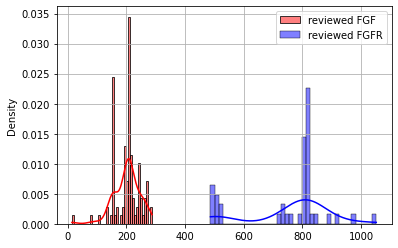

In [ ]:
# distribution in sequence length
# check the distribution of the picked ones
plt.figure()
sns.histplot(df_raw_fgf_Revi.Length.values, 
             bins=40, kde=True, stat='density', color="red", label="reviewed FGF");
sns.histplot(df_raw_fgfr_Revi.Length.values, 
             bins=40, kde=True, stat='density', color="blue", label="reviewed FGFR");

plt.grid()
plt.legend() 
plt.show()

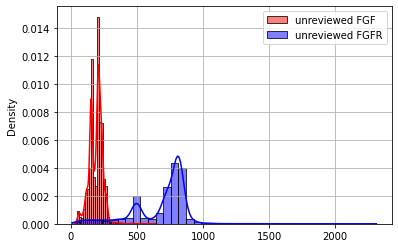

In [ ]:
plt.figure()
sns.histplot(df_raw_fgf_UnRe.Length.values, 
             bins=40, kde=True, stat='density', color="red", label="unreviewed FGF");
sns.histplot(df_raw_fgfr_UnRe.Length.values, 
             bins=40, kde=True, stat='density', color="blue", label="unreviewed FGFR");

plt.grid()
plt.legend() 
plt.show()

## 2. add labels

In [ ]:
# add a new label
# 0: growth factor
# 1: growth factor reciptor
def add_in_label_FGF(seq):
  return 0
def add_in_label_FGFR(seq):
  return 1

def add_gene_names(seq):
  return 'NaN'

In [ ]:
df_raw_fgf_Revi['GForGFR'] = df_raw_fgf_Revi['Sequence'].apply(add_in_label_FGF)
df_raw_fgfr_Revi['GForGFR'] = df_raw_fgfr_Revi['Sequence'].apply(add_in_label_FGFR)

df_raw_fgf_UnRe['GForGFR'] = df_raw_fgf_UnRe['Sequence'].apply(add_in_label_FGF)
df_raw_fgfr_UnRe['GForGFR'] = df_raw_fgfr_UnRe['Sequence'].apply(add_in_label_FGFR)

In [ ]:
df_raw_fgf_Revi['Gene names'] = df_raw_fgf_Revi['Sequence'].apply(add_gene_names)

In [ ]:
df_raw_fgf_Revi = df_raw_fgf_Revi.reindex(columns=['Entry','Entry name', 'Gene names','Status','Protein names','Organism','Length','Fragment','Sequence','GForGFR'])

In [ ]:
df_raw_fgf_Revi.head(2)

,Entry,Entry name,Gene names,Status,Protein names,Organism,Length,Fragment,Sequence,GForGFR
0,O88182,FGF18_RAT,NaN,reviewed,Fibroblast growth factor 18 (FGF-18),Rattus norvegicus (Rat),207,NaN,MYSAPSACTCLCLHFLLLCFQVQVLAAEENVDFRIHVENQTRARDD...,0
1,P36363,FGF7_MOUSE,NaN,reviewed,Fibroblast growth factor 7 (FGF-7) (Heparin-bi...,Mus musculus (Mouse),194,NaN,MRKWILTRILPTLLYRSCFHLVCLVGTISLACNDMSPEQTATSVNC...,0


In [ ]:
df_raw_fgfr_Revi.head(2)

,Entry,Entry name,Gene names,Status,Protein names,Organism,Length,Fragment,Sequence,GForGFR
0,P21802,FGFR2_HUMAN,FGFR2 BEK KGFR KSAM,reviewed,Fibroblast growth factor receptor 2 (FGFR-2) (...,Homo sapiens (Human),821,NaN,MVSWGRFICLVVVTMATLSLARPSFSLVEDTTLEPEEPPTKYQISQ...,1
1,P11362,FGFR1_HUMAN,FGFR1 BFGFR CEK FGFBR FLG FLT2 HBGFR,reviewed,Fibroblast growth factor receptor 1 (FGFR-1) (...,Homo sapiens (Human),822,NaN,MWSWKCLLFWAVLVTATLCTARPSPTLPEQAQPWGAPVEVESFLVH...,1


## 3. divide into three groups

In [ ]:

def divide_into_three_sets(df,trai_ratio):
  df_trai = df.sample( frac=trai_ratio )
  df_vali_test = df.drop( df_trai.index )

  df_vali = df_vali_test.sample( frac=0.5 )
  df_test = df_vali_test.drop( df_vali.index )

  return df_trai,df_vali,df_test

In [ ]:
# ration between groups: 80% + 10% +10%
training_ratio = 0.70

df_raw_fgf_Revi_trai,df_raw_fgf_Revi_vali,df_raw_fgf_Revi_test = \
  divide_into_three_sets( df_raw_fgf_Revi,training_ratio)

print(len( df_raw_fgf_Revi_trai))
print(len( df_raw_fgf_Revi_test))
print(len( df_raw_fgf_Revi_vali))

71
15
16


In [ ]:
df_raw_fgfr_Revi_trai,df_raw_fgfr_Revi_vali,df_raw_fgfr_Revi_test = \
  divide_into_three_sets( df_raw_fgfr_Revi,training_ratio)

print(len(df_raw_fgfr_Revi_trai))
print(len(df_raw_fgfr_Revi_vali))
print(len(df_raw_fgfr_Revi_test))

31
6
7


In [ ]:
df_raw_fgf_UnRe_trai,df_raw_fgf_UnRe_vali,df_raw_fgf_UnRe_test = \
  divide_into_three_sets( df_raw_fgf_UnRe,training_ratio)

print(len( df_raw_fgf_UnRe_trai))
print(len( df_raw_fgf_UnRe_test))
print(len( df_raw_fgf_UnRe_vali))

2466
529
528


In [ ]:
df_raw_fgfr_UnRe_trai,df_raw_fgfr_UnRe_vali,df_raw_fgfr_UnRe_test = \
  divide_into_three_sets( df_raw_fgfr_UnRe,training_ratio)

print(len( df_raw_fgfr_UnRe_trai))
print(len( df_raw_fgfr_UnRe_test))
print(len( df_raw_fgfr_UnRe_vali))

5944
1274
1274


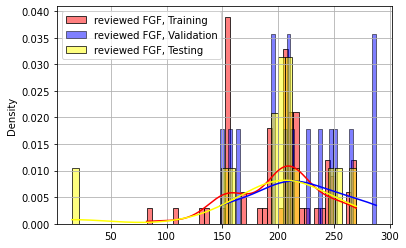

In [ ]:
# compare the three sets:
plt.figure()
sns.histplot(df_raw_fgf_Revi_trai.Length.values, 
             bins=40, kde=True, stat='density', color="red", label="reviewed FGF, Training");
sns.histplot(df_raw_fgf_Revi_vali.Length.values, 
             bins=40, kde=True, stat='density', color="blue", label="reviewed FGF, Validation");
sns.histplot(df_raw_fgf_Revi_test.Length.values, 
             bins=40, kde=True, stat='density', color="yellow", label="reviewed FGF, Testing");

plt.grid()
plt.legend() 
plt.show()

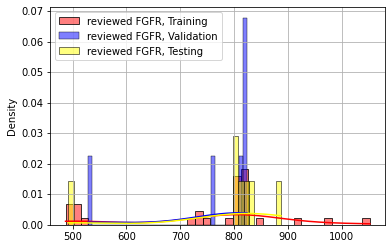

In [ ]:
plt.figure()
sns.histplot(df_raw_fgfr_Revi_trai.Length.values, 
             bins=40, kde=True, stat='density', color="red", label="reviewed FGFR, Training");
sns.histplot(df_raw_fgfr_Revi_vali.Length.values, 
             bins=40, kde=True, stat='density', color="blue", label="reviewed FGFR, Validation");
sns.histplot(df_raw_fgfr_Revi_test.Length.values, 
             bins=40, kde=True, stat='density', color="yellow", label="reviewed FGFR, Testing");

plt.grid()
plt.legend() 
plt.show()

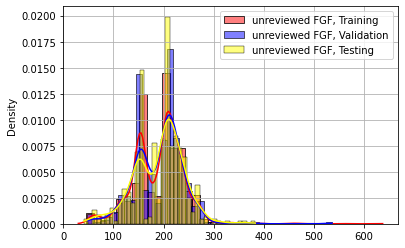

In [ ]:
plt.figure()
sns.histplot(df_raw_fgf_UnRe_trai.Length.values, 
             bins=40, kde=True, stat='density', color="red", label="unreviewed FGF, Training");
sns.histplot(df_raw_fgf_UnRe_vali.Length.values, 
             bins=40, kde=True, stat='density', color="blue", label="unreviewed FGF, Validation");
sns.histplot(df_raw_fgf_UnRe_test.Length.values, 
             bins=40, kde=True, stat='density', color="yellow", label="unreviewed FGF, Testing");

plt.grid()
plt.legend() 
plt.show()

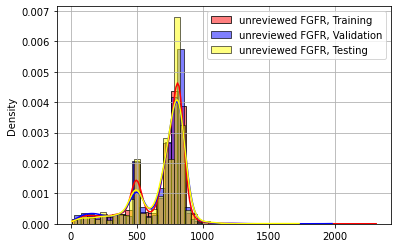

In [ ]:
plt.figure()
sns.histplot(df_raw_fgfr_UnRe_trai.Length.values, 
             bins=40, kde=True, stat='density', color="red", label="unreviewed FGFR, Training");
sns.histplot(df_raw_fgfr_UnRe_vali.Length.values, 
             bins=40, kde=True, stat='density', color="blue", label="unreviewed FGFR, Validation");
sns.histplot(df_raw_fgfr_UnRe_test.Length.values, 
             bins=40, kde=True, stat='density', color="yellow", label="unreviewed FGFR, Testing");

plt.grid()
plt.legend() 
plt.show()

In [ ]:
# mix the two parts
def mix_two_df(df_0, df_1):
  df_tot = pd.concat([df_0, df_1])
  df_tot = df_tot.sample(frac=1.0)
  return df_tot

In [ ]:
df_raw_fgf_Revi_trai.head(1)

,Entry,Entry name,Gene names,Status,Protein names,Organism,Length,Fragment,Sequence,GForGFR
59,P05230,FGF1_HUMAN,NaN,reviewed,Fibroblast growth factor 1 (FGF-1) (Acidic fib...,Homo sapiens (Human),155,NaN,MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTV...,0


In [ ]:
df_raw_fgfr_Revi_trai.head(1)

,Entry,Entry name,Gene names,Status,Protein names,Organism,Length,Fragment,Sequence,GForGFR
14,O43559,FRS3_HUMAN,FRS3,reviewed,Fibroblast growth factor receptor substrate 3 ...,Homo sapiens (Human),492,NaN,MGSCCSCLNRDSVPDNHPTKFKVTNVDDEGVELGSGVMELTQSELV...,1


In [ ]:
df_raw_fgf_UnRe_trai.head(1)

,Entry,Entry name,Gene names,Status,Protein names,Organism,Length,Fragment,Sequence,GForGFR
2707,A0A7L0H289,A0A7L0H289_HERCA,Fgf5 HERCAC_R14872,unreviewed,Fibroblast growth factor (FGF) (Fragment),Herpetotheres cachinnans (Laughing falcon) (Fa...,226,fragment,GGAQPGPAGRNAPAPSSSSSSSSSSSSSAAAAAGPSRFPRSRPGRR...,0


In [ ]:
df_raw_fgfr_UnRe_trai.head(1)

,Entry,Entry name,Gene names,Status,Protein names,Organism,Length,Fragment,Sequence,GForGFR
5096,A0A151WPX0,A0A151WPX0_9HYME,ALC60_10970,unreviewed,Fibroblast growth factor receptor (EC 2.7.10.1),Trachymyrmex zeteki,859,NaN,MQNVYVADAINPDVVVSVGEKLNLRCQQNFNFETTWYKDDEAFHKS...,1


In [ ]:
df_fgf_fgfr_Revi_trai = mix_two_df(df_raw_fgf_Revi_trai,df_raw_fgfr_Revi_trai)
df_fgf_fgfr_Revi_vali = mix_two_df(df_raw_fgf_Revi_vali,df_raw_fgfr_Revi_vali)
df_fgf_fgfr_Revi_test = mix_two_df(df_raw_fgf_Revi_test,df_raw_fgfr_Revi_test)

In [ ]:
df_fgf_fgfr_Revi_trai.head(1)

,Entry,Entry name,Gene names,Status,Protein names,Organism,Length,Fragment,Sequence,GForGFR
5,P21658,FGF6_MOUSE,NaN,reviewed,Fibroblast growth factor 6 (FGF-6) (Heparin se...,Mus musculus (Mouse),208,NaN,MALGQRLFITMSRGAGRVQGTLQALVFLGVLVGMVVPSPAGARANG...,0


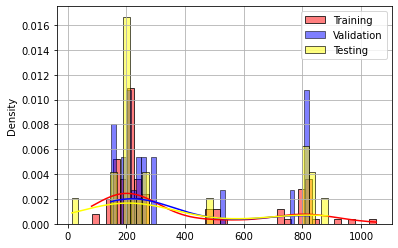

In [ ]:
# d. prepare the figures for the statistics of the mixed sets
plt.figure()

sns.histplot(df_fgf_fgfr_Revi_trai.Length.values, 
             bins=40, kde=True, stat='density', color="red", label="Training");
sns.histplot(df_fgf_fgfr_Revi_vali.Length.values, 
             bins=40, kde=True, stat='density', color="blue", label="Validation");
sns.histplot(df_fgf_fgfr_Revi_test.Length.values, 
             bins=40, kde=True, stat='density', color="yellow", label="Testing");

plt.grid()
plt.legend() 
plt.show()

In [ ]:
df_fgf_fgfr_UnRe_trai = mix_two_df(df_raw_fgf_UnRe_trai,df_raw_fgfr_UnRe_trai)
df_fgf_fgfr_UnRe_vali = mix_two_df(df_raw_fgf_UnRe_vali,df_raw_fgfr_UnRe_vali)
df_fgf_fgfr_UnRe_test = mix_two_df(df_raw_fgf_UnRe_test,df_raw_fgfr_UnRe_test)

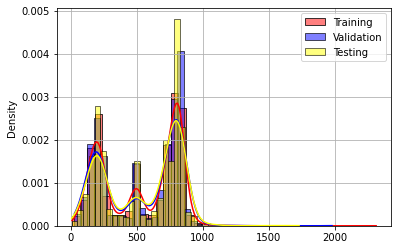

In [ ]:
plt.figure()

sns.histplot(df_fgf_fgfr_UnRe_trai.Length.values, 
             bins=40, kde=True, stat='density', color="red", label="Training");
sns.histplot(df_fgf_fgfr_UnRe_vali.Length.values, 
             bins=40, kde=True, stat='density', color="blue", label="Validation");
sns.histplot(df_fgf_fgfr_UnRe_test.Length.values, 
             bins=40, kde=True, stat='density', color="yellow", label="Testing");

plt.grid()
plt.legend() 
plt.show()

## 4. write into files

In [ ]:
Result_path='./drive/MyDrive/0_data_prepare_results/'

In [ ]:
# write into csv files
csv_fgf_fgfr_Revi_trai = Result_path+'fgf_fgfr_Revi_trai.csv'
csv_fgf_fgfr_Revi_vali = Result_path+'fgf_fgfr_Revi_vali.csv'
csv_fgf_fgfr_Revi_test = Result_path+'fgf_fgfr_Revi_test.csv'

csv_fgf_fgfr_UnRe_trai = Result_path+'fgf_fgfr_UnRe_trai.csv'
csv_fgf_fgfr_UnRe_vali = Result_path+'fgf_fgfr_UnRe_vali.csv'
csv_fgf_fgfr_UnRe_test = Result_path+'fgf_fgfr_UnRe_test.csv'

In [ ]:
df_fgf_fgfr_Revi_trai.to_csv(csv_fgf_fgfr_Revi_trai,
                             sep=',',index=False,encoding='utf-8')
df_fgf_fgfr_Revi_vali.to_csv(csv_fgf_fgfr_Revi_vali,
                             sep=',',index=False,encoding='utf-8')
df_fgf_fgfr_Revi_test.to_csv(csv_fgf_fgfr_Revi_test,
                             sep=',',index=False,encoding='utf-8')

In [ ]:
df_fgf_fgfr_UnRe_trai.to_csv(csv_fgf_fgfr_UnRe_trai,
                             sep=',',index=False,encoding='utf-8')
df_fgf_fgfr_UnRe_vali.to_csv(csv_fgf_fgfr_UnRe_vali,
                             sep=',',index=False,encoding='utf-8')
df_fgf_fgfr_UnRe_test.to_csv(csv_fgf_fgfr_UnRe_test,
                             sep=',',index=False,encoding='utf-8')